In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
import plotly.graph_objects as go  #plotly 4.0.0rc1
from plotly.subplots import make_subplots
from matplotlib import pyplot
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import itertools

from importlib import reload
import matplotlib.cm as cm # matplotlib's color map library
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/francesco/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


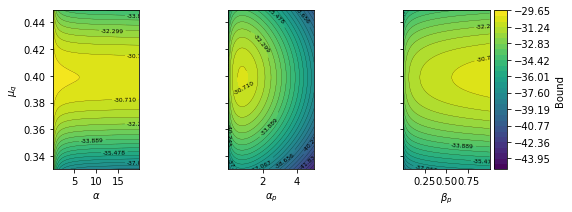

In [2]:
# sigma_q vs alpha (Renyi bound)

data_contour1 = pd.read_csv('../../numerical_analysis/contour_alpha_muq.csv')
data_contour1 = data_contour1.loc[:, ~data_contour1.columns.str.contains('^Unnamed')]
data_contour1 = data_contour1.fillna(np.nanmin(data_contour1.to_numpy()))
data_contour2 = pd.read_csv('../../numerical_analysis/contour_alpha_p_muq.csv')
data_contour2 = data_contour2.loc[:, ~data_contour2.columns.str.contains('^Unnamed')]
data_contour3 = pd.read_csv('../../numerical_analysis/contour_beta_p_muq.csv')
data_contour3 = data_contour3.loc[:, ~data_contour3.columns.str.contains('^Unnamed')]

linewidth_contour = 0.2
min_lev=data_contour2.to_numpy().min()
levels = np.linspace(data_contour2.to_numpy().min(),data_contour1.to_numpy().max(), num=30)

delta11 = 0.02
delta12 = 0.001
delta21 = 0.002
delta22 = 0.001
delta31 = 0.002
delta32 = 0.001

xlist1 = np.arange(0.0001, 20, delta11)
ylist1 = np.arange(0.33, 0.45, delta12)
xlist2 = np.arange(0.0001, 5, delta21)
ylist2 = np.arange(0.33, 0.45, delta22)
xlist3 = np.arange(0.0001, 1, delta31)
ylist3 = np.arange(0.33, 0.45, delta32)

x1, y1 = np.meshgrid(xlist1, ylist1)
x2, y2 = np.meshgrid(xlist2, ylist2)
x3, y3 = np.meshgrid(xlist3, ylist3)

fig, axes = plt.subplots(1,3,  figsize =(7,3))

cpf1 = axes[0].contourf(x1, y1, data_contour1.values.tolist(), levels)
line_colors1 = ['black' for l in cpf1.levels]
cp1 = axes[0].contour(x1, y1, data_contour1.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes[0].clabel(cp1, cp1.levels[::3], inline=True, fontsize=6)

cpf2 = axes[1].contourf(x2, y2, data_contour2.values.tolist(), levels)
line_colors2 = ['black' for l in cpf2.levels]
cp2 = axes[1].contour(x2, y2, data_contour2.values.tolist(),
                       levels=levels, colors=line_colors2, linewidths=linewidth_contour)
axes[1].clabel(cp2, cp2.levels[::3], inline=True, fontsize=6)

cpf3 = axes[2].contourf(x3, y3, data_contour3.values.tolist(), levels)
line_colors3 = ['black' for l in cpf3.levels]
cp3 = axes[2].contour(x3, y3, data_contour3.values.tolist(),
                       levels=levels, colors=line_colors3, linewidths=linewidth_contour)
axes[2].clabel(cp3, cp3.levels[::3], inline=True, fontsize=6)

#line_colors1 = ['black']
axes[0].set_xlabel(r'$\alpha$')
axes[0].set_ylabel(r'$\mu_q$')
axes[1].set_xlabel(r'$\alpha_p$')
axes[2].set_xlabel(r'$\beta_p$')
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

axins3 = inset_axes(axes[2],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes[2].transAxes,
                   borderpad=0,
                   )

plt.colorbar(cpf3,label='Bound', cax=axins3)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/univ_muq.pdf', bbox_inches='tight', pad_inches=0)
fig.tight_layout(w_pad=8.5, h_pad=0.5)


/home/francesco/.local/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


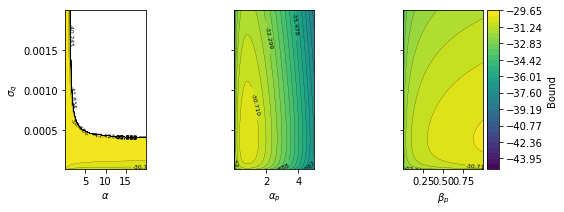

In [3]:
# sigma_q vs alpha (Renyi bound)

data_contour1 = pd.read_csv('../../numerical_analysis/contour_alpha_sigmaq.csv')
data_contour1 = data_contour1.loc[:, ~data_contour1.columns.str.contains('^Unnamed')]
data_contour1 = data_contour1.fillna(np.nanmin(data_contour1.to_numpy()))
data_contour2 = pd.read_csv('../../numerical_analysis/contour_alpha_p_sigmaq.csv')
data_contour2 = data_contour2.loc[:, ~data_contour2.columns.str.contains('^Unnamed')]
data_contour3 = pd.read_csv('../../numerical_analysis/contour_beta_p_sigmaq.csv')
data_contour3 = data_contour3.loc[:, ~data_contour3.columns.str.contains('^Unnamed')]

levels = np.linspace(min_lev,data_contour1.to_numpy().max(), num=30)

delta11 = 0.02
delta12 = 0.00001
delta21 = 0.002
delta22 = 0.00001
delta31 = 0.002
delta32 = 0.00001
xlist1 = np.arange(0.0001, 20, delta11)
ylist1 = np.arange(0.00001, 0.002, delta12)
xlist2 = np.arange(0.0001, 5, delta21)
ylist2 = np.arange(0.00001, 0.002, delta22)
xlist3 = np.arange(0.0001, 1, delta31)
ylist3 = np.arange(0.00001, 0.002, delta32)

x1, y1 = np.meshgrid(xlist1, ylist1)
x2, y2 = np.meshgrid(xlist2, ylist2)
x3, y3 = np.meshgrid(xlist3, ylist3)

fig, axes = plt.subplots(1,3,  figsize =(7,3))

cpf1 = axes[0].contourf(x1, y1, data_contour1.values.tolist(), levels)
line_colors1 = ['black' for l in cpf1.levels]
cp1 = axes[0].contour(x1, y1, data_contour1.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes[0].clabel(cp1, cp1.levels[::3], inline=True, fontsize=6)

cpf2 = axes[1].contourf(x2, y2, data_contour2.values.tolist(), levels)
line_colors2 = ['black' for l in cpf2.levels]
cp2 = axes[1].contour(x2, y2, data_contour2.values.tolist(),
                       levels=levels, colors=line_colors2, linewidths=linewidth_contour)
axes[1].clabel(cp2, cp2.levels[::3], inline=True, fontsize=6)

cpf3 = axes[2].contourf(x3, y3, data_contour3.values.tolist(), levels)
line_colors2 = ['black' for l in cpf3.levels]
cp3 = axes[2].contour(x3, y3, data_contour3.values.tolist(),
                       levels=levels, colors=line_colors3, linewidths=linewidth_contour)
axes[2].clabel(cp3, cp3.levels[::3], inline=True, fontsize=6)

#line_colors1 = ['black']
axes[0].set_xlabel(r'$\alpha$')
axes[0].set_ylabel(r'$\sigma_q$')
axes[1].set_xlabel(r'$\alpha_p$')
axes[2].set_xlabel(r'$\beta_p$')
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

axins3 = inset_axes(axes[2],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes[2].transAxes,
                   borderpad=0,
                   )

plt.colorbar(cpf3,label='Bound', cax=axins3)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/univ_sigma_q.pdf', bbox_inches='tight', pad_inches=0)
fig.tight_layout(w_pad=8.5, h_pad=0.5)




In [4]:
data_contour = pd.read_csv('../../numerical_analysis/contour_1e-06.csv')
data_contour1 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour = pd.read_csv('../../numerical_analysis/contour_0.5.csv')
data_contour2 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour = pd.read_csv('../../numerical_analysis/contour_0.99999.csv')
data_contour3 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour = pd.read_csv('../../numerical_analysis/contour_1000000000.0.csv')
data_contour4 = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

In [5]:
levels1 = np.logspace(np.log10(data_contour1.to_numpy().min()),np.log10(data_contour1.to_numpy().min())+0.1, num=10)
levels2 = np.logspace(np.log10(data_contour1.to_numpy().min())+0.135,np.log10(data_contour1.to_numpy().max()), num=20)
levels_1 = np.concatenate([levels1,levels2])

levels1 = np.logspace(np.log10(data_contour2.to_numpy().min()),np.log10(data_contour2.to_numpy().min())+0.1, num=10)
levels2 = np.logspace(np.log10(data_contour2.to_numpy().min())+0.135,np.log10(data_contour2.to_numpy().max()), num=20)
levels_2 = np.concatenate([levels1,levels2])

levels1 = np.logspace(np.log10(data_contour3.to_numpy().min()-0.000000001),np.log10(data_contour3.to_numpy().min())+0.1, num=4)
levels2 = np.logspace(np.log10(data_contour3.to_numpy().min())+0.135,np.log10(data_contour3.to_numpy().max()+0.001), num=20)
levels_3 = np.concatenate([levels1,levels2])

levels1 = np.logspace(np.log10(data_contour4.to_numpy().min()),np.log10(data_contour4.to_numpy().min())+0.1, num=4)
levels2 = np.logspace(np.log10(data_contour4.to_numpy().min())+0.135,np.log10(data_contour4.to_numpy().max()), num=20)
levels_4 = np.concatenate([levels1,levels2])

levels_1 = -levels_1[::-1]
levels_2 = -levels_2[::-1]
levels_3 = -levels_3[::-1]
levels_4 = -levels_4[::-1]


data_contour1 = - data_contour1
data_contour2 = - data_contour2
data_contour3 = - data_contour3
data_contour4 = - data_contour4


In [6]:
data_contour2

,bound_90,bound_91,bound_92,bound_93,bound_94,bound_95,bound_96,bound_97,bound_98,bound_99,...,bound_170,bound_171,bound_172,bound_173,bound_174,bound_175,bound_176,bound_177,bound_178,bound_179
0,-14.156448,-13.601081,-13.065464,-12.549600,-12.053486,-11.577126,-11.120516,-10.683658,-10.266550,-9.869195,...,-11.928717,-12.332004,-12.755039,-13.197830,-13.660368,-14.142662,-14.644709,-15.166502,-15.708052,-16.269348
1,-12.958840,-12.409835,-11.880396,-11.370526,-10.880220,-10.409483,-9.958312,-9.526707,-9.114666,-8.722192,...,-10.824846,-11.225450,-11.645617,-12.085356,-12.544660,-13.023537,-13.521983,-14.039993,-14.577579,-15.134728
2,-12.287421,-11.749607,-11.231014,-10.731644,-10.251492,-9.790558,-9.348839,-8.926333,-8.523038,-8.138955,...,-10.282143,-10.676463,-11.089999,-11.522761,-11.974743,-12.445954,-12.936394,-13.446058,-13.974959,-14.523089
3,-11.737278,-11.214773,-10.711027,-10.226036,-9.759792,-9.312289,-8.883519,-8.473477,-8.082154,-7.709549,...,-9.889782,-10.274624,-10.678204,-11.100533,-11.541609,-12.001448,-12.480052,-12.977422,-13.493574,-14.028504
4,-11.229817,-10.725879,-10.240167,-9.772665,-9.323355,-8.892224,-8.479254,-8.084430,-7.707735,-7.349159,...,-9.562318,-9.935017,-10.325876,-10.734916,-11.162141,-11.607574,-12.071226,-12.553104,-13.053232,-13.571615
5,-10.741779,-10.258804,-9.793487,-9.345794,-8.915694,-8.503159,-8.108156,-7.730659,-7.370635,-7.028061,...,-9.269656,-9.628122,-10.004108,-10.397644,-10.808746,-11.237446,-11.683762,-12.147717,-12.629345,-13.128658
6,-10.266939,-9.806555,-9.363246,-8.936962,-8.527651,-8.135264,-7.759755,-7.401073,-7.059171,-6.734008,...,-8.999407,-9.342119,-9.701671,-10.078102,-10.471444,-10.881741,-11.309022,-11.753325,-12.214693,-12.693155
7,-9.805285,-9.368484,-8.948176,-8.544289,-8.156747,-7.785482,-7.430421,-7.091495,-6.768634,-6.461776,...,-8.746375,-9.072331,-9.414421,-9.772699,-10.147208,-10.538008,-10.945143,-11.368661,-11.808622,-12.265070
8,-9.359004,-8.946280,-8.549465,-8.168468,-7.803188,-7.453530,-7.119399,-6.800702,-6.497345,-6.209240,...,-8.508594,-8.817238,-9.141296,-9.480837,-9.835917,-10.206607,-10.592969,-10.995065,-11.412968,-11.846737
9,-8.930799,-8.542255,-8.169042,-7.811036,-7.468118,-7.140164,-6.827058,-6.528677,-6.244906,-5.975632,...,-8.285525,-8.576679,-8.882518,-9.203123,-9.538566,-9.888928,-10.254288,-10.634717,-11.030307,-11.441132


/home/francesco/.local/lib/python3.7/site-packages/ipykernel_launcher.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/francesco/.local/lib/python3.7/site-packages/ipykernel_launcher.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


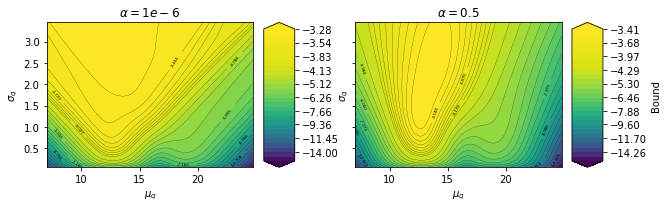

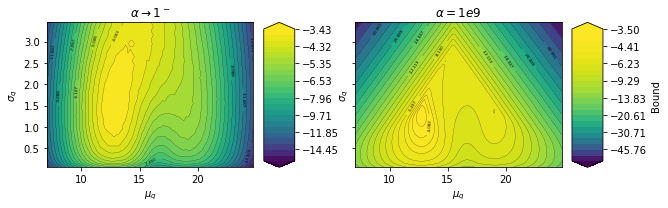

In [7]:


delta1 = 0.2
delta2 = 0.1
xlist = np.arange(7, 25, delta1)
ylist = np.arange(0.05, 3.5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig1, axes1 = plt.subplots(1, 2, figsize =(8,3), sharey=True, sharex=True)
fig2, axes2 = plt.subplots(1, 2, figsize =(8,3), sharey=True, sharex=True)

#cp = ax.contourf(x, y, data_contour.values.tolist(), 50, linewidths=1)
#line_colors = ['black' for l in cp.levels]


cpf1 = axes1[0].contourf(x, y, data_contour1.values.tolist(), levels_1, extend="both")
line_colors1 = ['black' for l in cpf1.levels]
cp1 = axes1[0].contour(x, y, data_contour1.values.tolist(),
                       levels=levels_1, colors=line_colors1, linewidths=linewidth_contour)




# Set all level lines to black
cpf2 = axes1[1].contourf(x, y, data_contour2.values.tolist(), levels_2, extend="both")
line_colors2 = ['black' for l in cpf2.levels]
cp2 = axes1[1].contour(x, y, data_contour2.values.tolist(),
                       levels=levels_2, colors=line_colors2, linewidths=linewidth_contour)
# Make plot and customize axes
#plt.colorbar(cp)
cpf3 = axes2[0].contourf(x, y, data_contour3.values.tolist(), levels_3, extend="both")
line_colors3 = ['black' for l in cpf3.levels]
cp3 = axes2[0].contour(x, y, data_contour3.values.tolist(),
                       levels=levels_3, colors=line_colors3, linewidths=linewidth_contour)

# Set all level lines to black
cpf4 = axes2[1].contourf(x, y, data_contour4.values.tolist(), levels_4, extend="both")
line_colors4 = ['black' for l in cpf4.levels]
cp4 = axes2[1].contour(x, y, data_contour4.values.tolist(),
                       levels=levels_4, colors=line_colors4, linewidths=linewidth_contour)
#ax.clabel(cp, fontsize=10, colors=line_colors)


#axes.set_box_aspect(1)
#axes[0].set_box_aspect(1)
#axes[1].set_box_aspect(1)
#axes[2].set_box_aspect(1)
#axes[3].set_box_aspect(1)
axins0 = inset_axes(axes1[0],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes1[0].transAxes,
                   borderpad=0,
                   )

axins1 = inset_axes(axes1[1],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes1[1].transAxes,
                   borderpad=0,
                   )

axins2 = inset_axes(axes2[0],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes2[0].transAxes,
                   borderpad=0,
                   )

axins3 = inset_axes(axes2[1],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes2[1].transAxes,
                   borderpad=0,
                   )
axes1[0].clabel(cp1, cp1.levels[::3], inline=True, fontsize=4)
axes1[1].clabel(cp2, cp2.levels[::3], inline=True, fontsize=4)
axes2[0].clabel(cp3, cp3.levels[::3], inline=True, fontsize=4)
axes2[1].clabel(cp4, cp4.levels[::3], inline=True, fontsize=4)



plt.colorbar(cpf1, cax=axins0)  # draw colorbar
plt.colorbar(cpf2,label='Bound', cax=axins1)  # draw colorbar
plt.colorbar(cpf3, cax=axins2)  # draw colorbar

plt.colorbar(cpf4,label='Bound', cax=axins3)  # draw colorbar

#fig.text(0.51, 0.01, 'Bias', ha='center')
#fig.text(0.00, 0.5, 'Weight', va='center', rotation='vertical')#axes[0].set_title(r'Optimization in the true $J(\theta)$')
axes1[0].set_xlabel(r'$\mu_q$')
axes1[0].set_ylabel(r'$\sigma_q$')
axes1[0].set_title(r'$\alpha = 1e-6$')
axes1[1].set_title(r'$\alpha = 0.5$')
axes2[0].set_title(r'$\alpha \rightarrow 1^-$')
axes2[1].set_title(r'$\alpha = 1e9$')
axes1[1].set_xlabel(r'$\mu_q$')
axes1[1].set_ylabel(r'$\sigma_q$')
axes2[0].set_xlabel(r'$\mu_q$')
axes2[0].set_ylabel(r'$\sigma_q$')
axes2[1].set_xlabel(r'$\mu_q$')
axes2[1].set_ylabel(r'$\sigma_q$')
#fig1.suptitle('PVF optimization after 60 episodes', fontsize=8)
#fig2.suptitle('PVF optimization after 500 episodes', fontsize=8)
fig1.tight_layout(w_pad=8.5, h_pad=0.5)
fig2.tight_layout(w_pad=8.5, h_pad=4.5)
#fig1.savefig('contour_1.pdf', bbox_inches='tight', pad_inches=0)
#fig2.savefig('contour_2.pdf', bbox_inches='tight', pad_inches=0)